In [191]:
from manim import *

import random

In [252]:
%%manim -ql -v CRITICAL ham
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

COLORS = [GREY,BLUE,RED]

my_delay = 1


def set_new_location(A,B):
    A.set_x(B.get_x())
    A.set_y(B.get_y())
    
def set_convex_location(who,A,B,C,wA=0.333,wB=0.333,wC=0.333):
    who.set_x(wA*A.get_x()+wB*B.get_x()+wC*C.get_x())
    who.set_y(wA*A.get_y()+wB*B.get_y()+wC*C.get_y())
    

class ham(Scene):
    def construct(self):
        #"#cc0000"
        #myRed, myOrange, myYellow, myGreen, myBlue, myPurple = "#ff4242", "#e69138", "#f1c232", "#6aa84f", "#3d85c6", "#8e7cc3"
        #myOrange = ORANGE
        
        #myRed, myOrange, myYellow, myGreen, myBlue, myPurple = "#ff595E", "#ff924c", "#ffca3a", "#8ac926", "#1a8ad0", "#8863bb"
        myRed, myOrange, myYellow, myGreen, myBlue, myPurple = "#ff006d", "#ff7d00", "#ffdd00", "#70b600", "#01befe", "#b555ff"
        
        data_colors = [myRed, myBlue, myYellow, WHITE]
        parity_colors = [myPurple, myOrange, myGreen]
        bit_font_size = 100
        
        data_val = ["1","0","1","1"]
        parity_val = ["0","1","0"]
        
        def flip_bit(string_bit):
            if string_bit == "1":
                return "0"
            elif string_bit == "0":
                return "1"
            
        DELAY = 0.1
        
        #myRed = RED_D
        #myRed, myOrange, myYellow, myGreen, myBlue, myPurple = RED_E, ORANGE, YELLOW_E, GREEN_E, BLUE_E, PURPLE_E
        # Define the radius of the circles
        center_distance = 2.9
        radius = 2.6
        
        circle_color =GREY
        # Create three circles
        circleLeft = Circle(radius=radius, color=circle_color).shift(0.5*LEFT * center_distance)
        circleRight = Circle(radius=radius, color=circle_color).shift(0.5*RIGHT * center_distance)
        
        # The third circle will be positioned at the top of the equilateral triangle
        triangle_height = center_distance * np.sqrt(3) / 2
        circleUp = Circle(radius=radius, color=circle_color).shift(UP * triangle_height)
        
        circle_group = VGroup(circleUp,circleLeft,circleRight)
        
        #my_square = Square(side_length=7.99,color=YELLOW)
        #my_square.to_edge(RIGHT)
        #self.add(my_square)
        
        #set_new_location(circle_group,my_square)
        #circle_group.shift(4*RIGHT)
        circle_group.set_y(0)
        #self.add(circle_group)
        
        data_bits = [MathTex(data_val[i],font_size=bit_font_size,color=data_colors[i]) for i in range(4)]
        
        
        set_convex_location(data_bits[3],circleLeft,circleRight,circleUp)
        #self.add(bit_4)
        
        c = 0.5
        
        set_convex_location(data_bits[2],circleLeft,circleRight,circleUp,wA=c,wB=c,wC=-c)
        data_bits[2].shift(0.1*DOWN)
        
        set_convex_location(data_bits[0],circleLeft,circleRight,circleUp,wA=c,wB=-c,wC=c)
        #self.add(bit_2)
        
        set_convex_location(data_bits[1],circleLeft,circleRight,circleUp,wA=-c,wB=c,wC=c)
        #self.add(bit_1)
        
        pc = 1
        
        parity_bits = [MathTex(parity_val[i],font_size=bit_font_size,color=parity_colors[i]) for i in range(3)]
        set_convex_location(parity_bits[0],data_bits[0],data_bits[1],data_bits[2],wA=pc,wB=pc,wC=-pc)
        parity_bits[0].shift(DOWN*0.1)
        set_convex_location(parity_bits[1],data_bits[0],data_bits[1],data_bits[2],wA=pc,wB=-pc,wC=pc)
        set_convex_location(parity_bits[2],data_bits[0],data_bits[1],data_bits[2],wA=-pc,wB=pc,wC=pc)
        
        #pbit_2 = MathTex("1",font_size=bit_font_size,color=myOrange)
        #set_convex_location(pbit_2,bit_1,bit_2,bit_3,wA=pc,wB=-pc,wC=pc)
        
        #pbit_3 = MathTex("1",font_size=bit_font_size,color=myPurple)
        #set_convex_location(pbit_3,bit_1,bit_2,bit_3,wA=-pc,wB=pc,wC=pc)
        
        #self.add(pbit_1,pbit_2,pbit_3)
        
        big_group = VGroup(circle_group,*data_bits,*parity_bits)
        big_group.to_edge(RIGHT)
        #self.add(big_group)
        
        data_string = VGroup(*[ MathTex(data_val[i],font_size=bit_font_size,color=data_colors[i]) for i in range(4) ]).arrange(RIGHT,buff=0.4).to_corner(UL,buff=1.0)
        parity_string = VGroup(*[ MathTex(parity_val[i],font_size=bit_font_size,color=parity_colors[i]) for i in range(3) ]).arrange(RIGHT,buff=0.4).next_to(data_string,buff=0.8)
        
        #self.add(data_string,error_string)
        
        for i in data_string:
            data_string.color = WHITE
        
        #draw in the data string
        self.play(LaggedStart(*[Write(data_string[i]) for i in range(4)], lag_ratio=0.5))
        self.wait(DELAY)
        
        #animate coloring in the data string
        self.play(LaggedStart(*[data_string[i].animate.set_color(data_colors[i]) for i in range(4)], lag_ratio=0.5))
        self.wait(DELAY)
        
        #draw in the venn diagram circles
        self.play(LaggedStart(*[Write(circle_group[i]) for i in range(3)], lag_ratio=0.5))
        self.wait(DELAY)
        
        #copy over the data bits into the venn diagram
        self.play(LaggedStart(*[ReplacementTransform(data_string[i].copy(), data_bits[i]) for i in range(4)], lag_ratio=0.75))
        self.wait(DELAY)
        
        #draw in the parity bit one by one
        self.play(Transform(VGroup(data_bits[3],data_bits[0],data_bits[1]).copy(),parity_bits[0]))
        self.wait(DELAY)
        #
        self.play(Transform(VGroup(data_bits[3],data_bits[0],data_bits[2]).copy(),parity_bits[1]))
        self.wait(DELAY)
        #
        self.play(Transform(VGroup(data_bits[3],data_bits[1],data_bits[2]).copy(),parity_bits[2]))
        self.wait(DELAY)
        
        
        #copy them over to the string
        self.play(LaggedStart(*[ReplacementTransform(parity_bits[i].copy(), parity_string[i]) for i in range(3)], lag_ratio=0.5))
        self.wait(DELAY)
        
        
        ###
        flip_ix = 0
        f_data_bit = MathTex(flip_bit(data_val[flip_ix]),font_size=bit_font_size,color=data_colors[flip_ix])
        f_string_bit = f_data_bit.copy()
        set_new_location(f_string_bit,data_string[flip_ix])
        set_new_location(f_data_bit,data_bits[flip_ix])
        
        data_string_copy = data_string[flip_ix].copy()
        data_bit_copy = data_bits[flip_ix].copy()
        
        flash_args = {"color":data_colors[flip_ix],"line_length":0.5,"flash_radius":0.25}
        self.play(Flash(data_string[flip_ix],**flash_args),
                  ReplacementTransform(data_string[flip_ix],f_string_bit),
                  Flash(data_bits[flip_ix],**flash_args),
                  ReplacementTransform(data_bits[flip_ix],f_data_bit))
        self.wait(DELAY)
        
        check_ixs = [0,1]
        which_bits=[ [parity_bits[0],data_bits[0],data_bits[1],data_bits[3]], 
                     [parity_bits[1],data_bits[0],data_bits[2],data_bits[3]] ]
        errors = [MathTex("!!!",font_size=bit_font_size,color=parity_colors[i]) for i in check_ixs]
        for i in check_ixs:
            set_convex_location(errors[i],data_bits[3],parity_bits[i],parity_bits[i],wA=0.35,wB=0.65,wC=0.0)
            #self.play(Circumscribe(circleUp,Circle,buff=-0.01,color=parity_colors[i]))
            self.play(Transform(VGroup(*which_bits[i]).copy(),errors[i]),
                      circle_group[i].animate.set_color(parity_colors[i]),
                     )
            self.wait(DELAY)
        
        boxs = [SurroundingRectangle(f_data_bit,color=parity_colors[i],buff=0.1 + 0.1*i,corner_radius=0.2) for i in check_ixs]
        #string_boxs = [SurroundingRectangle(f_string_bit,color=parity_colors[i],buff=0.1 + 0.1*i,corner_radius=0.2) for i in check_ixs]
        
        self.play(*[Transform(errors[i].copy(),boxs[i]) for i in check_ixs])
        self.wait(DELAY)
        
        self.play(Transform(f_data_bit,data_bit_copy))
        self.wait(DELAY)
        
        
        self.play(Transform(data_bit_copy.copy(),data_string_copy),FadeOut(f_string_bit))
        self.wait(DELAY)
        
        self.wait(2)
        
        
        
        
        
        
        
        
        
        # Add all the circles to the scene
        #self.play(Create(circle1), Create(circle2), Create(circle3))

        # Hold the scene for a few seconds
        #self.wait(2)
        

In [192]:
%%manim -ql -v CRITICAL LightningStrike

class LightningStrike(Scene):
    def construct(self):
        # Create a target Mobject (e.g., a square)
        target = Square(side_length=2)
        target.set_color(WHITE).set_fill(WHITE, opacity=0.8)
        target.shift(DOWN * 2)
        self.play(Create(target))

        # Use the function to create the lightning
        lightning, flash = self.create_lightning(target)
        
        # Animate the lightning hitting the target
        self.play(Create(lightning), run_time=0.3)

        # Flash effect when lightning strikes
        self.play(FadeIn(flash), run_time=0.1)
        self.play(FadeOut(flash), run_time=0.1)

        # Remove the lightning after it strikes
        self.play(FadeOut(lightning), run_time=0.2)

        self.wait(1)

    # Function to create the lightning effect
    def create_lightning(self, target, num_segments=8, spread=0.5, lightning_color=YELLOW):
        # Generate a random lightning path
        def generate_lightning_path(start, end, num_segments, spread):
            points = [start]
            for _ in range(num_segments):
                prev_point = points[-1]
                random_offset = np.array([
                    random.uniform(-spread, spread),  # Random horizontal movement
                    -1 * (end[1] - start[1]) / num_segments,  # Move down vertically
                    0  # Keep z-axis as 0 (2D)
                ])
                points.append(prev_point + random_offset)
            points.append(end)
            return points

        # Starting point (above the scene) and ending point (target's center)
        start_point = np.array([0, 3, 0])
        end_point = target.get_center()

        # Create the jagged lightning path
        lightning_points = generate_lightning_path(start_point, end_point, num_segments, spread)
        lightning = VMobject()
        lightning.set_points_as_corners(lightning_points)
        lightning.set_color(lightning_color).set_stroke(width=5)

        # Create a flash when the lightning hits the target
        flash = Circle(radius=0.5, color=WHITE, fill_opacity=0.9).move_to(target.get_center())

        # Return both the lightning and flash Mobjects
        return lightning, flash


In [223]:
%%manim -qh -v CRITICAL fib
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

COLORS = [GREY,BLUE,RED]

my_delay = 1


def set_new_location(A,B):
    A.set_x(B.get_x())
    A.set_y(B.get_y())

class fib(Scene):
    def construct(self):
        text_strs = ["1","..","1","..","2","..","3","..","5","..","8","..","13","..","21"]
        text = VGroup(*[MathTex(my_str,font_size=140) for my_str in text_strs]).arrange(RIGHT)
        text.to_edge(UP)
        text.set_y(1.33)
        
        text_copy = text.copy()
        for i in [0,2,4,6,8,10,12,14]:
            text_copy[i].color = GRAY_C
            self.add(text_copy[i])
        
        human_rect = Rectangle(width=3, height=4, color=YELLOW)
        human_rect.to_corner(DL,buff=0.1)
        #human_rect.to_edge(DOWN,buff=0)
        
        #placeholder for where the human will go
        #self.add(human_rect)
        #self.add(text)
        
        #1, 1 appear
        self.play(AnimationGroup(Write(text[0]),Write(text[2]),lag_ratio=0.5))
        self.wait(my_delay)
        
        eqn_color = GRAY_A
        my_run_time = 0.3
        
        def animate_next_fib(ix):
            #+
            plus = MathTex("+",color=eqn_color,font_size=110)
            set_new_location(plus,text[ix+1])
            text[ix+1] = plus
            anim_plus = Write(text[ix+1])
            #self.play()
            #self.wait(my_delay)

            #=
            equals = MathTex("=",color=eqn_color,font_size=110)
            set_new_location(equals,text[ix+3])
            text[ix+3] = equals
            anim_equals = FadeIn(text[ix+3],shift=RIGHT)
            
            #play them
            self.play(AnimationGroup(anim_plus,anim_equals,lag_ratio=0.5),run_time=1.25*my_run_time)

            #next number
            my_group = VGroup(text[ix+0].copy(),text[ix+2].copy())
            self.play(ReplacementTransform(my_group,text[ix+4],path_arc=-PI/2),run_time=1.5*my_run_time)
            self.play(FadeOut(text[ix+1]),FadeOut(text[ix+3]),run_time=0.9*my_run_time)
            
        for ix in [0,2,4,6,8,10]:
            animate_next_fib(ix)
        
        for i in [0,2,4,6,8,10,12,14]:
            self.remove(text_copy[i])
            
        self.wait(my_delay)
        
        #setup miles approx kms
        text_strs = ["99", r"\text{miles}",r"\approx","99",r"\text{km}"]
        my_fontsizes = [140,110,140,140,120]
        mi_to_km = VGroup(*[MathTex(text_strs[i],font_size=my_fontsizes[i]) for i in range(5)]).arrange(RIGHT,buff=0.5)
        mi_to_km.to_edge(RIGHT,buff=0.6)
        mi_to_km.set_y(-1.33)
        
        mi_to_km[1].color = BLUE
        mi_to_km[4].color = RED
        mi_to_km[2].color = GRAY_A
        #mi_to_km.shift(LEFT*mi_to_km[2].get_x()) #center the approx
        
        left_box = SurroundingRectangle(VGroup(*mi_to_km[0:2]),color=BLUE,buff=0.25)
        right_box = SurroundingRectangle(VGroup(*mi_to_km[3:5]),color=RED,buff=0.25)
        
        #self.add(mi_to_km)
        #self.add(left_box)
        #self.add(right_box)
           
        
        my_buff = 0.2
        l_box = SurroundingRectangle(text[6],color=BLUE,buff=my_buff)
        r_box = SurroundingRectangle(text[8],color=RED,buff=my_buff)
        anim_l_box = Create(l_box)
        anim_r_box = Create(r_box)
        self.play(AnimationGroup(anim_l_box,anim_r_box,lag_ratio=0.5))
        self.wait(my_delay)

        def animate_approx(ix,val_l,val_r):
            nonlocal l_box, r_box
            
            replace_l = ReplacementTransform(l_box.copy(),VGroup(left_box,mi_to_km[1]))
            replace_r = ReplacementTransform(r_box.copy(),VGroup(right_box,mi_to_km[4]))
            
            temp = MathTex(val_l,font_size=140) 
            set_new_location(temp,mi_to_km[0])
            mi_to_km[0] = temp

            temp =  MathTex(val_r,font_size=140) 
            set_new_location(temp,mi_to_km[3])
            mi_to_km[3] = temp

            replace_l_num = ReplacementTransform(text[ix].copy(),mi_to_km[0])
            replace_r_num = ReplacementTransform(text[ix+2].copy(),mi_to_km[3])
            approx_anim = FadeIn(mi_to_km[2],shift=DOWN)
            self.play(AnimationGroup(replace_l_num,replace_l,approx_anim,replace_r_num,replace_r,lag_ratio=0.5))
            self.wait(my_delay)
            fade_out_anim = FadeOut(mi_to_km,left_box,right_box,shift=DOWN)
            self.play(fade_out_anim)

        def move_boxes_over(ix):
            nonlocal l_box, r_box
            
            l_box_target = SurroundingRectangle(text[ix],color=BLUE,buff=my_buff)
            r_box_target = SurroundingRectangle(text[ix+2],color=RED,buff=my_buff)

            return AnimationGroup(Transform(l_box,l_box_target),Transform(r_box,r_box_target))
            
            #l_box = l_box_target
            #r_box = r_box_target
            
        
        #initial run
        animate_approx(6,val_l="3",val_r="5")
        self.play(move_boxes_over(8))
        animate_approx(8,val_l="5",val_r="8")
        self.play(move_boxes_over(10))
        animate_approx(10,val_l="8",val_r="13")
        self.play(move_boxes_over(12))
        animate_approx(12,val_l="13",val_r="21")
        
        #the times 10s
        #self.play(move_boxes_over(6))
        #times_10 = MathTex(r"\times 10",font_size=100,color=PURPLE_A)
        #times_10.next_to(text[7],DOWN,buff=0.55)
        
        #self.play(FadeIn(times_10,shift=DOWN))
        #animate_approx(6,val_l="30",val_r="50")
        #self.play(AnimationGroup(FadeOut(times_10),move_boxes_over(8),lag_ratio=0.5))
        
        #the times 11
        self.play(move_boxes_over(8))
        times_11 = MathTex(r"\times 11",font_size=100,color=PURPLE_A)
        times_11.next_to(text[9],DOWN,buff=0.55)
        self.play(FadeIn(times_11,shift=DOWN))
        animate_approx(8,val_l="55",val_r="88")
        self.play(FadeOut(times_11))
        
        #F_n+1/F_n
        fib_r = MathTex(r"F_{n+1}",r"\over",r"F_{n}",font_size=110)
        a_mi_km = MathTex(r"\approx",r"\frac{1\text{ mile }}{1\text{ km }}",font_size=110)
        to_phi = MathTex(r"\to",r"\varphi",font_size=120)
        to_phi[-1].color = YELLOW
        
        set_new_location(fib_r,mi_to_km[0])
        fib_r.align_to(left_box,LEFT)
        a_mi_km.next_to(fib_r,RIGHT)
        fib_r[0].color = RED
        fib_r[2].color = BLUE
        self.play(ReplacementTransform(r_box.copy(),fib_r[0]),ReplacementTransform(l_box.copy(),fib_r[2]),FadeIn(fib_r[1],a_mi_km,shift=DOWN))
        self.wait(my_delay)
        
        to_phi.next_to(fib_r,RIGHT)
        a_mi_km.generate_target()
        a_mi_km.target.next_to(to_phi,RIGHT)
        
        self.play(MoveToTarget(a_mi_km),FadeIn(to_phi,shift=RIGHT))
        self.wait(my_delay)
        phi_eqn = MathTex(r"\varphi", r"=",r"\frac{1+\sqrt{5}}{2}", r" = 1.618\ldots",font_size=120)
        phi_eqn[0].color = YELLOW
        phi_eqn[2].scale(0.8)
        phi_eqn.set_y(1.5)
        
        my_fade_group = [text[0],text[2],text[4],text[6],text[8],text[10],text[12],text[14],l_box,r_box]
        self.play(FadeOut(*my_fade_group,shift=UP),ReplacementTransform(to_phi[-1].copy(),phi_eqn[0]))
        self.wait(my_delay)
        self.play(Write(VGroup(phi_eqn[1],phi_eqn[2])))
        self.wait(my_delay)
        self.play(Write(phi_eqn[3]))
        
        
        
        self.wait(2)
        

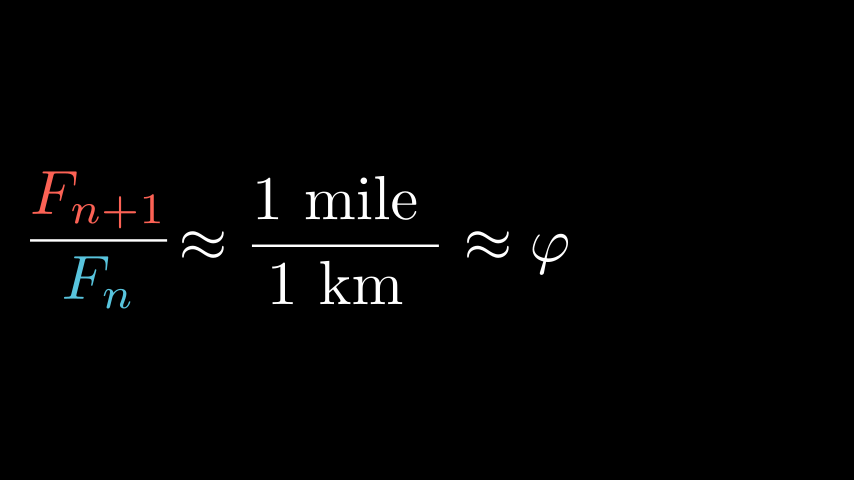

In [179]:
%%manim -ql -v CRITICAL fib
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

COLORS = [GREY,BLUE,RED]

my_delay = 0.1


def set_new_location(A,B):
    A.set_x(B.get_x())
    A.set_y(B.get_y())

class fib(Scene):
    def construct(self):
        eqn = MathTex(r"F_{n+1}",r"\over",r"F_{n}",font_size=100)
        eqnB = MathTex(r"\approx",r"\frac{1\text{ mile }}{1\text{ km }}",r"\approx",r"\varphi",font_size=100)
        eqn.to_edge(LEFT)
        eqnB.next_to(eqn,RIGHT)
        eqn[0].color = RED
        eqn[2].color = BLUE
        self.add(eqn,eqnB)
